# TensorFlow 2.0
TensorFlow 2.0 representa una evolución de una librería de software para deep learning a un ecosistema para todo tipo de machine learning.

Enfocado en simplicidad, facilidad de uso y nuevas capacidades:
- Construcción sencilla de modelos por medio de Keras y _eager execution_.
- Despliegue robusto de modelos en producción en cualquier plataforma.
- Poderosa experimentación para investigadores.
- APIs simplificadas al eliminar APIs deprecadas y reducir duplicidad.

En TensorFlow 2.0 se han empaquetado diversos componentes desarrollados durante el ciclo de vida de TensorFlow 1.0 para proveer de una plataforma que soporte flujos de Machine Learning desde entrenamiento hasta despliegue.
<img src="images/tf2-architecture.png" alt="TensorFlow 2.0 Architecture" title="TensorFlow 2.0 Architecture"/>
Tensorflow.js soporta modelos de entrenamiento, enlaces con otros lenguajes con diversos niveles de soporte incluyendo Swift, R y Julia.
## Desarrollo fácil de modelos
En TensorFlow 2.0 Keras, un API estándar de machine learning amigable para los usuarios, será el API central de alto nivel para desarrollar y entrenar modelos. El API de Keras facilita iniciar con TensorFlow. Keras provee de diversos APIs de construcción de modelos (Sequential, Functional y Subclassing), que permiten elegir en nivel adecuado de abstracción para cada proyeto. La implementación de TensorFlow incluye mejoras tales como _eager execution_ para iteración inmediata, depuración intuitiva y tf.data para construir ductos de entrada de datos escalables.

Flujo de referencia:
1. Cargar datos por medio de tf.data. Los datos de entrenamiento se leen empleando ductos de entrada que son creados empleando `tf.data`. Las características de los features, por ejemplo bucketing y feature crosses se describen empleando `tf.feature_column`. También se soporta la carga de datos que estén en memoria (por ejemplo NumPy).
2. Construir, entrenar y validar el modelo con tf.keras o emplear Premade Estimators. Keras se integra fuertemente con el resto de TensorFlow, por lo que es es posible acceder a las características de TensorFlow cuando sea requerido. Se cuenta con un conjunto de modelos estándar empaquetados (por ejemplo regresión lineal y logística, gradient boosted trees, árboles aleatorios) para emplearse directamente (implementados con el API `tf.estimator`). TensorFlow Hub provee de módulos para entrenar un modelo Keras o Estimator para quienes no estén buscando entrenar un modelo desde cero.
3. Ejecutar y depurar con _eager execution_ y posteriormente emplear tf.function para contar con los beneficios de los grafos. TensorFlow 2.0 corre con con _eager execution_ por default para facilidad de uso y depuración. La anotación `tf_function` traduce de forma transparente los programas de Python a grafos de TensorFlow. Este proceso retiene todas las ventajas de la ejecución basada en grafos de TensorFlow: optimizaciones de desempeño, ejecución remota y la capacidad de serializar, exportar y desplegar fácilmente, añadiendo la flexibilidad y facilidad de uso de expresar programas en Python.
4. Entrenamiento distribuido por medio de Distribution Strategies. Para tareas de entrenamiento de machine learning grandes, el API Distribution Strategy facilita distribuir y entrenar modelos en diversas configuraciones de hardware sin cambiar las definiciones del modelo. Debido a que TensorFlow provee soporte para un rango de aceleradores de hardware com CPUs, GPUs y TPUs, es posible habilitar tareas de entrenamiento para ser distribuidas en un solo nodo con multi aceleradores así como múltiples nodos con multi aceleradores, incluyendo TPU pods. A pesar que este API soporta una variedad de configuraciones de cluster, se proveen de plantillas para desplegar entrenamiento en clusters de Kubernetes en ambientes on premise o en la nube.
5. Exportar a SavedModel. TensorFlow estandariza en SavedModel como un formato de intercambio para TensorFlow Serving, TensorFlow Lite, TensorFlow.js TensorFlow Hub y más.





## Eager Execution
En TensorFlow 2.0 _eager execution_ se encuentra habilitada por omisión. Se trata de una plataforma de machine learning flexible para investigación y experimentación que provee:

Una interfaz intuitiva - El código se estructura de forma natural y emplea estructuras de datos de Python.

Facilita la depuración - Permite invocar operaciones directamente para inspeccionar modelos en ejecución y probar cambios.

Control de flujo natural - Es posible emplear estatutos de control de flujo de Python en vez de flujo de control de grafos.

Con _eager execution_ cada línea de código puede ser ejecutada paso a paso y ver la salida de las diversas operaciones.

### Regresión lineal con Eager execution


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        self.W = tf.Variable(16.0)
        self.b = tf.Variable(10.0)

    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()
model(20)



<tf.Tensor: id=19, shape=(), dtype=float32, numpy=330.0>

In [9]:
TRUE_W = 3.0 # slope
TRUE_b = 0.5 # intercept

NUM_EXAMPLES = 1000

X = tf.random.normal(shape=(NUM_EXAMPLES,))
noise = tf.random.normal(shape=(NUM_EXAMPLES,))
y = X * TRUE_W + TRUE_b + noise

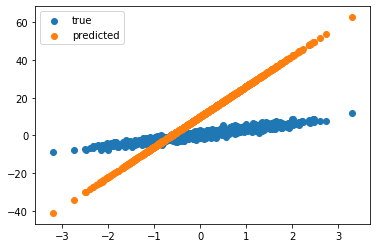

In [10]:
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()

In [11]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [12]:
def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))

    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

Epoch 0: Loss: 264.9639587402344
Epoch 1: Loss: 168.31654357910156
Epoch 2: Loss: 107.0546875
Epoch 3: Loss: 68.22273254394531
Epoch 4: Loss: 43.608375549316406
Epoch 5: Loss: 28.0061092376709
Epoch 6: Loss: 18.116317749023438
Epoch 7: Loss: 11.847485542297363
Epoch 8: Loss: 7.873863697052002
Epoch 9: Loss: 5.355105400085449
Epoch 10: Loss: 3.7585439682006836
Epoch 11: Loss: 2.746530771255493
Epoch 12: Loss: 2.1050469875335693
Epoch 13: Loss: 1.6984292268753052
Epoch 14: Loss: 1.4406861066818237
Epoch 15: Loss: 1.2773113250732422
Epoch 16: Loss: 1.1737521886825562
Epoch 17: Loss: 1.1081093549728394
Epoch 18: Loss: 1.066500186920166
Epoch 19: Loss: 1.0401252508163452


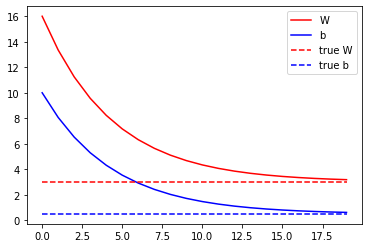

In [13]:
model = Model()
Ws, bs = [], []
epochs = 20
for epoch in range(epochs):
    Ws.append(model.W.numpy()) # eager execution allows us to do this
    bs.append(model.b.numpy())

    current_loss = loss(y, model(X))

    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")

plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

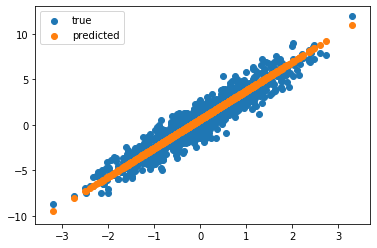

In [14]:
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()

## AutoGraph
AutoGraph integra la facilidad de _eager execution_ con el poder de los grafos de TensorFlow. Se trata de un mini compilador que tansforma un suconjunto de estatutos de Python en grafos TensorFlow portables de alto desempeño. AutoGraph se implementa por medio del decorador __tf.function__.

Guía de [tf.function](https://tensorflow.org/guide/function)


In [12]:
@tf.function
def simple_nn_layer(x,y):
    return tf.nn.relu(tf.matmul(x,y))

Para verificar el código transformado se emplea la siguente función:
`tf.autograph_to_code([FUNCTION].python_function)`

In [14]:
print(tf.autograph.to_code(simple_nn_layer.python_function))

def tf__simple_nn_layer(x, y):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('simple_nn_layer', 'simple_nn_layer_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as simple_nn_layer_scope:
    do_return = True
    retval_ = simple_nn_layer_scope.mark_return_value(ag__.converted_call(tf.nn.relu, simple_nn_layer_scope.callopts, (ag__.converted_call(tf.matmul, simple_nn_layer_scope.callopts, (x, y), None, simple_nn_layer_scope),), None, simple_nn_layer_scope))
  do_return,
  return ag__.retval(retval_)



## tf.data: Construcción de ductos de entrada en TensorFlow
El API `tf.data` permite crear ductos de entrada de información complejos a partir de piezas simples y reutilizables. Por ejemplo, el canal para un modelo de una imagen puede agregar datos de un sistema de archivos distribuido, aplicar distorciones aleatorias a los datos y seleccionar imágenes aletoriamente para formar lotes de entrenamiento. El ducto para un modelo de texto pude involucar la extracción de símbolos de los datos crudos, convertirlos a identificadores de _embedding_ con una tabla de búsqueda y crear secuencias de distintas longitudes. El API `tf.data` facilita el manejo de grandes volúmenes de datos, leer distintos formatos de datos y realizar transformaciones complejas.

El API `tf.data` introduce la abstracción `tf.data.Dataset` que representa una secuencia de elementos, en la que cada elemento consta de uno o varios componentes. Por ejemplo, en un ducto de imágenes, un elemento puede ser una sola instancia de entrenamiento, con un par de componentes de tipo tensor que representen la imagen y su etiqueta.

Existen dos formas distintas de crear un dataset:
- Una fuente de datos construye un `Dataset` a partir de datos almacenados en memoria o en uno a varios archivos.
- Una transformación de datos construye un dataset a partir de uno o más objetos `tf.data.Dataset`.

### Mecanismos básicos en tf.data
Para crear un ducto de entrada, es necesario comenzar con una fuente de datos. Por ejemplo, para construir un `Dataset` a partir de datos en memoria, es posible usar la función `tf.data.Dataset.from_tensors()` o `tf.data.Dataset.from_tensor_slices()`. Adicionalmente, si los datos de entrada se encuentran almacenados en un archivo en el formato recomendado TFRecord, entonces es posible usar `tf.data.TFRecordDataset()`.

Tan pronto se cuenta con un objeto `Dataset`, es posible transformarlo a un nuevo `Dataset` al encadenar llamadas a métodos en el objeto `tf.data.Dataset`. Por ejemplo, es posible aplicar transformaciones a nivel elemento tales como `Dataset.map()`, transformaciones de múltiples elementos por medio de `Dataset.batch()`. 

El objeto `Dataset` es iterable en Python, esto hace posible consumir sus elementos en un ciclo for o por medio de un iterador de Python empleando `iter` y consumiendo sus elementos por medio de `next`.

In [16]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [22]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


In [18]:
it =iter(dataset)
print(next(it).numpy())

8


Los elementos del dataset pueden ser consumidos por medio de la transformación `reduce`, la cual reduce todos los elementos para producir un solo resultado. El siguiente ejemplo muestra cómo emplear la transformación `reduce` para calcular la suma de los enteros del dataset.

In [19]:
print(dataset.reduce(0, lambda state, value: state + value).numpy())

22


### Estructura de Dataset
El dataset contiene elementos que cada uno tiene la misma estructura (posiblemente anidada). Los componentes individuales de la estructura pueden ser de cualquier tipo representable por `tf.TypeSpec`, incluyendo `Tensor`, `SpareTensor`, `ReggedTensor`, `TensorArray` o `Dataset`.

La propiedad `Dataset.element_spec` permite inspeccionar el tipo de cada componente elemento. La propiedad regresa una _estructura anidada_ de objetos de tipo `tf.TypeSpec`, correspondiendo a la estructura del elemento, que puede ser un componente individual, una tupla de componentes o una tupla anidada de componentes. Por ejemplo:

In [23]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
dataset1.element_spec

for elem in dataset1:
    print(elem.numpy())

[0.6655909  0.94411564 0.59940386 0.15574741 0.82490456 0.71379817
 0.42073965 0.6360599  0.44297493 0.64345074]
[0.39316833 0.7352749  0.970222   0.3958999  0.22365856 0.1825577
 0.6799797  0.06345797 0.6179118  0.8401288 ]
[0.35148644 0.0802449  0.8576987  0.62366986 0.99468565 0.01894534
 0.15734673 0.6185744  0.43325245 0.3346858 ]
[0.05768669 0.23243737 0.2533927  0.5837455  0.9510044  0.09786999
 0.58159506 0.3753841  0.27343524 0.2839042 ]


In [24]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]),
    tf.random.uniform([4,100], maxval=100, dtype=tf.int32)))
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

## tf.function

## Keras en TensorFlow
`tf.keras` es la implementación de TensorFlow de la [especificación del API Keras](https://keras.io/). Se trata de un API de alto nivel para construir y entrenar modelos que incluye soporte de primer nivel para funcionalidad específica para TensorFlow, tal como _eager execution_, ductos `tf.data` y Estimators. `tf.keras` simplifica el uso de TensorFlow sin sacrificar su flexibilidad y desempeño.

In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

En Keras se ensamblan capas para construir modelos. Un modelo generalmente es un grafo de capas. El tipo más frecuente de modelo es una pila de capas: el modelo `tf.keras.Sequential`.

### Modelo secuencial en Keras
En este ejemplo se hará uso de Keras para:
1. Construir una red neuronal para clasificar imágenes.
2. Entrenar la red neuronal.
3. Evaluar la exactitud del modelo.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Importar TensorFlow
import tensorflow as tf




Cargar y preparar el dataset. Convertir las muestras de enteros a punto flotante:

In [26]:
# Cargar y preparar el dataset MNIST
mnist = tf.keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Construir el modelo `tf.keras.Sequential` apilando capas. Seleccionar un optimizador y una función de pérdida para el entrenamiento:

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

Para cada ejemplo el modelo regresa un vector de calificaciones "logits" o "log-odds", una para cada clase.

In [29]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.68169683, -0.9641397 ,  0.13740572, -0.06085459,  0.2630964 ,
         0.34369478,  0.06596713,  0.09106264,  0.71229196, -0.08875154]],
      dtype=float32)

La función `tf.nn.softmax` convierte estos logits a "probabilidades" para cada clase.

In [30]:
tf.nn.softmax(predictions).numpy()

array([[0.16107577, 0.03106365, 0.09346469, 0.07665566, 0.10598254,
        0.11487824, 0.08702062, 0.08923208, 0.16608006, 0.07454675]],
      dtype=float32)

In [34]:
print(y_train[:1])

[5]


In [15]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.0.0


In [1]:
#TF 2.0
#Hello TensorFlow 2.0
import tensorflow as tf
msg2 = tf.constant('Hello TensorFlow 2.0')
tf.print(msg2)

Hello TensorFlow 2.0
